In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

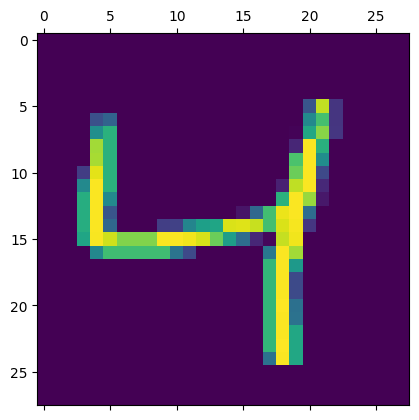

In [7]:
plt.matshow(X_train[2]);

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4702 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3044 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.9259


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9262


[0.2664371430873871, 0.9261999726295471]

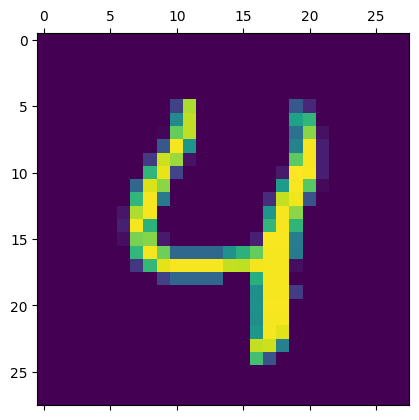

In [18]:
plt.matshow(X_test[4]);

In [19]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [20]:
y_predicted[4]

array([3.79055813e-02, 4.85578639e-05, 1.75230250e-01, 3.56991519e-03,
       9.87956822e-01, 1.26445675e-02, 1.08131185e-01, 1.64886907e-01,
       3.25988770e-01, 7.52112389e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[4])

4

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    6,    2,    3,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  928,   13,    8,    4,   11,   10,   43,    3],
       [   1,    0,   21,  920,    0,   23,    2,   10,   26,    7],
       [   1,    1,    5,    1,  914,    0,    9,    3,   10,   38],
       [   8,    3,    4,   35,    7,  779,   12,    4,   34,    6],
       [   8,    3,    8,    1,    8,   14,  911,    2,    3,    0],
       [   1,    8,   22,    7,    8,    1,    0,  934,    4,   43],
       [   5,    9,    5,   20,    9,   24,    8,    6,  881,    7],
       [   8,    7,    2,   11,   24,    5,    0,   15,   12,  925]],
      dtype=int32)>

In [33]:
model2 = keras.Sequential([
                          keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')])
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2696 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1200 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0491 - accuracy: 0.9850


In [34]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9750


[0.0806046575307846, 0.9750000238418579]

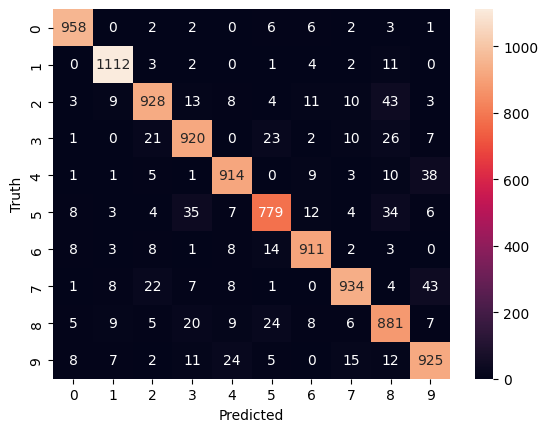

In [25]:
# Model 1 without hidden layers
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth");

313/313 [==============================] - 0s 2ms/step


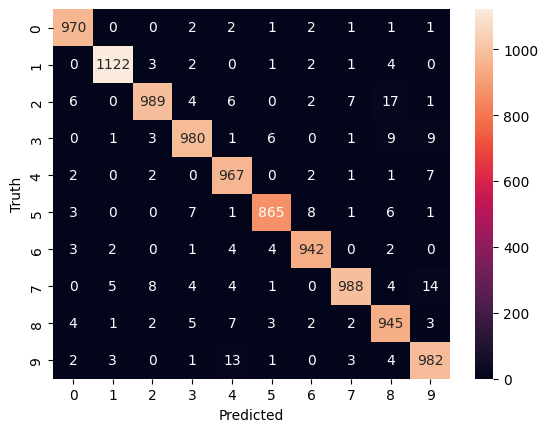

In [36]:
# Model 2 with hidden layers
y_predicted = model2.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm
import seaborn as sns
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth");